### 14.1.1 数据探索

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### 1 数据加载

In [2]:
data = pd.read_csv("./purchase_redeem/user_balance_table.csv")
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,20140825,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,20140831,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,20140724,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,20140727,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              int64  
 1   report_date          int64  
 2   tBalance             int64  
 3   yBalance             int64  
 4   total_purchase_amt   int64  
 5   direct_purchase_amt  int64  
 6   purchase_bal_amt     int64  
 7   purchase_bank_amt    int64  
 8   total_redeem_amt     int64  
 9   consume_amt          int64  
 10  transfer_amt         int64  
 11  tftobal_amt          int64  
 12  tftocard_amt         int64  
 13  share_amt            int64  
 14  category1            float64
 15  category2            float64
 16  category3            float64
 17  category4            float64
dtypes: float64(4), int64(14)
memory usage: 390.1 MB


In [4]:
data = pd.read_csv("./purchase_redeem/user_balance_table.csv", parse_dates=["report_date"])
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840421 entries, 0 to 2840420
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   user_id              int64         
 1   report_date          datetime64[ns]
 2   tBalance             int64         
 3   yBalance             int64         
 4   total_purchase_amt   int64         
 5   direct_purchase_amt  int64         
 6   purchase_bal_amt     int64         
 7   purchase_bank_amt    int64         
 8   total_redeem_amt     int64         
 9   consume_amt          int64         
 10  transfer_amt         int64         
 11  tftobal_amt          int64         
 12  tftocard_amt         int64         
 13  share_amt            int64         
 14  category1            float64       
 15  category2            float64       
 16  category3            float64       
 17  category4            float64       
dtypes: datetime64[ns](1), float64(4), int64(13)
memory usage: 390.

#### 2 数据聚合

In [6]:
total_balance = data.groupby(["report_date"])["total_purchase_amt", "total_redeem_amt"].sum()
total_balance

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


#### 3 purchase数据

In [7]:
# 购买
purchase = total_balance[["total_purchase_amt"]]
purchase

,total_purchase_amt
report_date,
2013-07-01,32488348
2013-07-02,29037390
2013-07-03,27270770
2013-07-04,18321185
2013-07-05,11648749
...,...
2014-08-27,302194801
2014-08-28,245082751
2014-08-29,267554713


#### 4 redeem（赎回）数据

In [8]:
# 赎回
redeem = total_balance[["total_redeem_amt"]]
redeem

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


#### 5  将数据拆解为trend(趋势),seasonal（季节）,residual（残差）三个维度

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


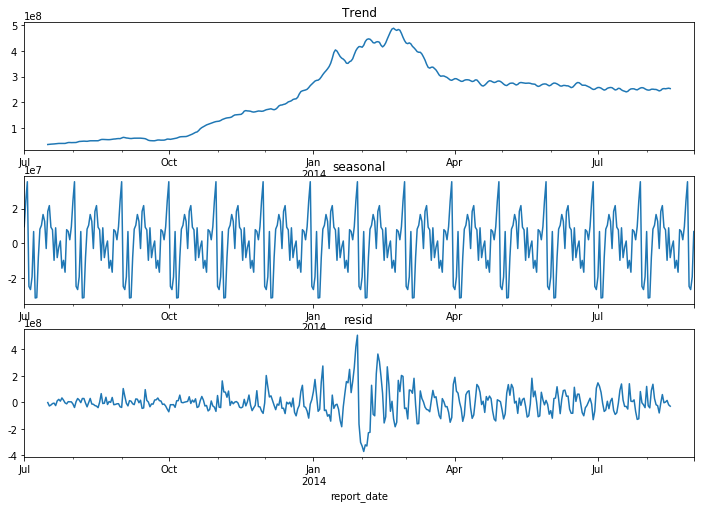

In [9]:
# 指定区间范围内的数据，进行可视化
def plot_stl(data):
    # STL返回三个部分:trend(趋势),seasonal（季节）,residual（残差）
    result = sm.tsa.seasonal_decompose(data, period=30)
    # 可视化
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    result.trend.plot(ax=ax1, title="Trend")
    result.seasonal.plot(ax=ax2, title="seasonal")
    result.resid.plot(ax=ax3, title="resid")

plot_stl(purchase.total_purchase_amt)

### 14.1.2 Prophet建模

In [10]:
# 注意，只能linux机
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


#### 1 构建符合Prophet格式的数据

In [11]:
purchase["ds"] = purchase.index
purchase.rename(columns={"total_purchase_amt": "y"}, inplace=True)
purchase

,y,ds
report_date,,
2013-07-01,32488348,2013-07-01
2013-07-02,29037390,2013-07-02
2013-07-03,27270770,2013-07-03
2013-07-04,18321185,2013-07-04
2013-07-05,11648749,2013-07-05
...,...,...
2014-08-27,302194801,2014-08-27
2014-08-28,245082751,2014-08-28
2014-08-29,267554713,2014-08-29


In [12]:
purchase = purchase.reset_index(drop=True)
purchase

,y,ds
0,32488348,2013-07-01
1,29037390,2013-07-02
2,27270770,2013-07-03
3,18321185,2013-07-04
4,11648749,2013-07-05
...,...,...
422,302194801,2014-08-27
423,245082751,2014-08-28
424,267554713,2014-08-29
425,199708772,2014-08-30


In [13]:
redeem["ds"] = redeem.index
redeem.rename(columns={"total_redeem_amt": "y"}, inplace=True)
redeem

,y,ds
report_date,,
2013-07-01,5525022,2013-07-01
2013-07-02,2554548,2013-07-02
2013-07-03,5953867,2013-07-03
2013-07-04,6410729,2013-07-04
2013-07-05,2763587,2013-07-05
...,...,...
2014-08-27,468164147,2014-08-27
2014-08-28,297893861,2014-08-28
2014-08-29,273756380,2014-08-29


In [14]:
redeem = redeem.reset_index(drop=True)
redeem

,y,ds
0,5525022,2013-07-01
1,2554548,2013-07-02
2,5953867,2013-07-03
3,6410729,2013-07-04
4,2763587,2013-07-05
...,...,...
422,468164147,2014-08-27
423,297893861,2014-08-28
424,273756380,2014-08-29
425,196374134,2014-08-30


#### 2 purchase拟合Prophet模型

In [15]:
model = Prophet(seasonality_prior_scale=0.1)

In [16]:
model.fit(purchase)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = model.make_future_dataframe(periods=30)
purchase_pred = model.predict(future)
purchase_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.390200e+07,-8.414562e+07,1.421598e+08,-1.390200e+07,-1.390200e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,0.0,0.0,0.0,3.100237e+07
1,2013-07-02,-1.275445e+07,-8.940869e+07,1.554508e+08,-1.275445e+07,-1.275445e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,4.759439e+07,0.0,0.0,0.0,3.483994e+07
2,2013-07-03,-1.160690e+07,-9.056218e+07,1.412991e+08,-1.160690e+07,-1.160690e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,3.767602e+07,0.0,0.0,0.0,2.606912e+07
3,2013-07-04,-1.045934e+07,-9.843062e+07,1.245115e+08,-1.045934e+07,-1.045934e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,1.948427e+07,0.0,0.0,0.0,9.024934e+06
4,2013-07-05,-9.311787e+06,-1.483994e+08,8.756215e+07,-9.311787e+06,-9.311787e+06,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,0.0,0.0,0.0,-2.719947e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.022295e+08,7.420882e+07,2.935143e+08,1.980999e+08,2.061815e+08,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,-1.788769e+07,0.0,0.0,0.0,1.843418e+08
453,2014-09-27,2.014997e+08,2.063902e+07,2.456731e+08,1.970486e+08,2.057058e+08,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,-6.949576e+07,0.0,0.0,0.0,1.320040e+08
454,2014-09-28,2.007699e+08,1.975889e+07,2.497749e+08,1.960830e+08,2.051763e+08,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,-6.227561e+07,0.0,0.0,0.0,1.384943e+08
455,2014-09-29,2.000401e+08,1.248620e+08,3.550534e+08,1.950389e+08,2.047054e+08,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,4.490438e+07,0.0,0.0,0.0,2.449445e+08


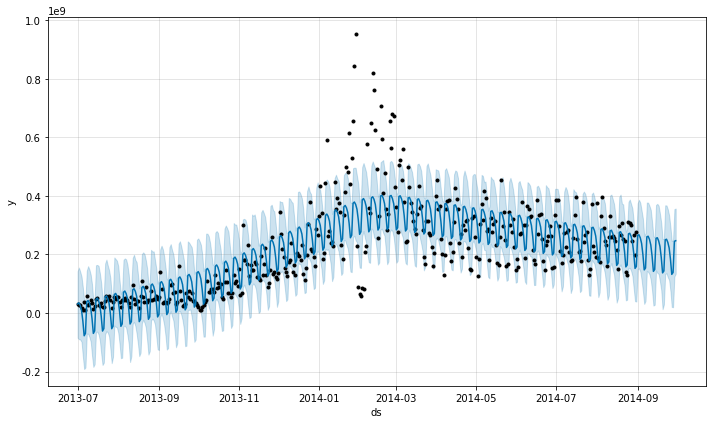

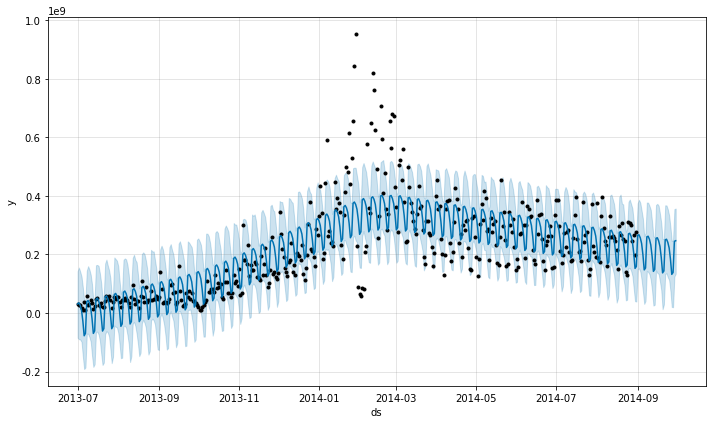

In [18]:
model.plot(purchase_pred)

#### 3 redeem拟合Prophet模型

In [19]:
model2 = Prophet(weekly_seasonality=True, seasonality_prior_scale=0.1, n_changepoints=300)
model2.fit(redeem)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = model2.make_future_dataframe(periods=30)
redeem_pred = model2.predict(future)
redeem_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-07-01,-1.556521e+07,-5.378635e+07,1.199392e+08,-1.556521e+07,-1.556521e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,0.0,0.0,0.0,3.339246e+07
1,2013-07-02,-1.482612e+07,-7.544418e+07,8.672002e+07,-1.482612e+07,-1.482612e+07,2.273017e+07,2.273017e+07,2.273017e+07,2.273017e+07,2.273017e+07,2.273017e+07,0.0,0.0,0.0,7.904048e+06
2,2013-07-03,-1.408704e+07,-7.446244e+07,9.417256e+07,-1.408704e+07,-1.408704e+07,2.487539e+07,2.487539e+07,2.487539e+07,2.487539e+07,2.487539e+07,2.487539e+07,0.0,0.0,0.0,1.078836e+07
3,2013-07-04,-1.334795e+07,-9.179393e+07,7.844837e+07,-1.334795e+07,-1.334795e+07,6.121558e+06,6.121558e+06,6.121558e+06,6.121558e+06,6.121558e+06,6.121558e+06,0.0,0.0,0.0,-7.226390e+06
4,2013-07-05,-1.260886e+07,-1.074081e+08,6.070645e+07,-1.260886e+07,-1.260886e+07,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,0.0,0.0,0.0,-1.712113e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2014-09-26,2.903652e+08,2.022708e+08,3.712336e+08,2.897377e+08,2.910432e+08,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,-4.512272e+06,0.0,0.0,0.0,2.858529e+08
453,2014-09-27,2.905247e+08,1.446654e+08,3.239239e+08,2.898590e+08,2.912432e+08,-5.844884e+07,-5.844884e+07,-5.844884e+07,-5.844884e+07,-5.844884e+07,-5.844884e+07,0.0,0.0,0.0,2.320758e+08
454,2014-09-28,2.906842e+08,1.640933e+08,3.319765e+08,2.899816e+08,2.914489e+08,-3.972369e+07,-3.972369e+07,-3.972369e+07,-3.972369e+07,-3.972369e+07,-3.972369e+07,0.0,0.0,0.0,2.509605e+08
455,2014-09-29,2.908437e+08,2.569719e+08,4.272945e+08,2.901018e+08,2.916561e+08,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,4.895767e+07,0.0,0.0,0.0,3.398013e+08


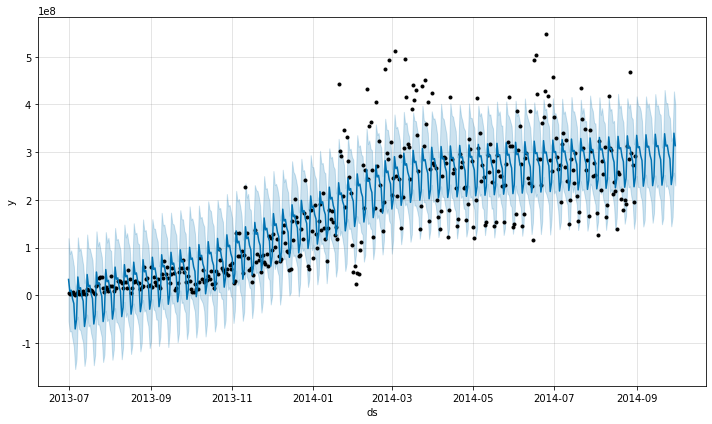

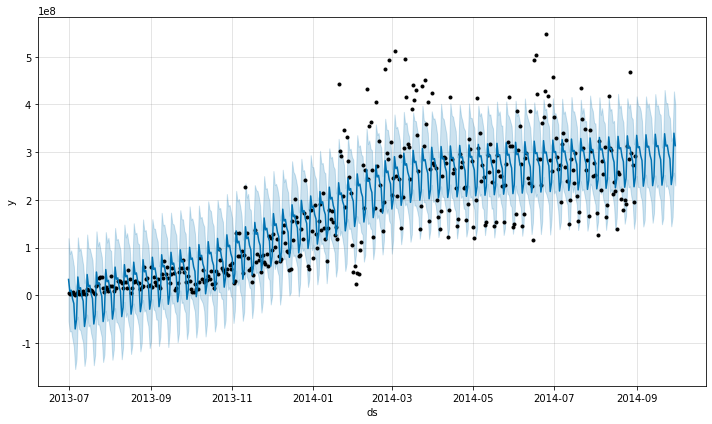

In [21]:
model2.plot(redeem_pred)

#### 4 筛选预测出的数据

In [22]:
purchase2 = purchase_pred[(purchase_pred["ds"] >= "2014-09-01") & (purchase_pred["ds"] <= "2014-09-30")][["ds", "yhat"]]
purchase2

,ds,yhat
427,2014-09-01,2.653792e+08
428,2014-09-02,2.673394e+08
429,2014-09-03,2.566912e+08
430,2014-09-04,2.377697e+08
431,2014-09-05,1.996679e+08
432,2014-09-06,1.473300e+08
433,2014-09-07,1.538204e+08
434,2014-09-08,2.602705e+08
435,2014-09-09,2.622307e+08
436,2014-09-10,2.515825e+08


In [23]:
redeem2 = redeem_pred[(redeem_pred["ds"] >= "2014-09-01") & (redeem_pred["ds"] <= "2014-09-30")][["ds", "yhat"]]
redeem2

,ds,yhat
427,2014-09-01,3.353353e+08
428,2014-09-02,3.092673e+08
429,2014-09-03,3.115720e+08
430,2014-09-04,2.929777e+08
431,2014-09-05,2.825034e+08
432,2014-09-06,2.287263e+08
433,2014-09-07,2.476110e+08
434,2014-09-08,3.364518e+08
435,2014-09-09,3.103838e+08
436,2014-09-10,3.126885e+08


#### 5 合并结果

In [24]:
result = pd.DataFrame()
result["ds"] = purchase2.ds
result["purchase_amt"] = purchase2.yhat
result["redeem_amt"] = redeem2.yhat
result

,ds,purchase_amt,redeem_amt
427,2014-09-01,2.653792e+08,3.353353e+08
428,2014-09-02,2.673394e+08,3.092673e+08
429,2014-09-03,2.566912e+08,3.115720e+08
430,2014-09-04,2.377697e+08,2.929777e+08
431,2014-09-05,1.996679e+08,2.825034e+08
432,2014-09-06,1.473300e+08,2.287263e+08
433,2014-09-07,1.538204e+08,2.476110e+08
434,2014-09-08,2.602705e+08,3.364518e+08
435,2014-09-09,2.622307e+08,3.103838e+08
436,2014-09-10,2.515825e+08,3.126885e+08


In [25]:
result["ds"] = result["ds"].apply(lambda x: str(x).replace("-", "")[:8])
result

,ds,purchase_amt,redeem_amt
427,20140901,2.653792e+08,3.353353e+08
428,20140902,2.673394e+08,3.092673e+08
429,20140903,2.566912e+08,3.115720e+08
430,20140904,2.377697e+08,2.929777e+08
431,20140905,1.996679e+08,2.825034e+08
432,20140906,1.473300e+08,2.287263e+08
433,20140907,1.538204e+08,2.476110e+08
434,20140908,2.602705e+08,3.364518e+08
435,20140909,2.622307e+08,3.103838e+08
436,20140910,2.515825e+08,3.126885e+08


In [26]:
result.to_csv("prophet.csv", header=None, index=False)

##### 6 分数

**finalScore:78.5184**

### 14.1.3 arima建模

#### 1 数据重加载

In [27]:
purchase = total_balance[["total_purchase_amt"]]
purchase

,total_purchase_amt
report_date,
2013-07-01,32488348
2013-07-02,29037390
2013-07-03,27270770
2013-07-04,18321185
2013-07-05,11648749
...,...
2014-08-27,302194801
2014-08-28,245082751
2014-08-29,267554713


In [28]:
redeem = total_balance[["total_redeem_amt"]]
redeem

,total_redeem_amt
report_date,
2013-07-01,5525022
2013-07-02,2554548
2013-07-03,5953867
2013-07-04,6410729
2013-07-05,2763587
...,...
2014-08-27,468164147
2014-08-28,297893861
2014-08-29,273756380


#### 2 选取稳定的数据

In [29]:
purchase2 = purchase[(purchase.index >= "2014-04-01") & (purchase.index <= "2014-05-07")]
purchase2

,total_purchase_amt
report_date,
2014-04-01,453320585
2014-04-02,355347118
2014-04-03,363877120
2014-04-04,251895894
2014-04-05,202336542
2014-04-06,129477254
2014-04-07,196936223
2014-04-08,354770149
2014-04-09,383347565


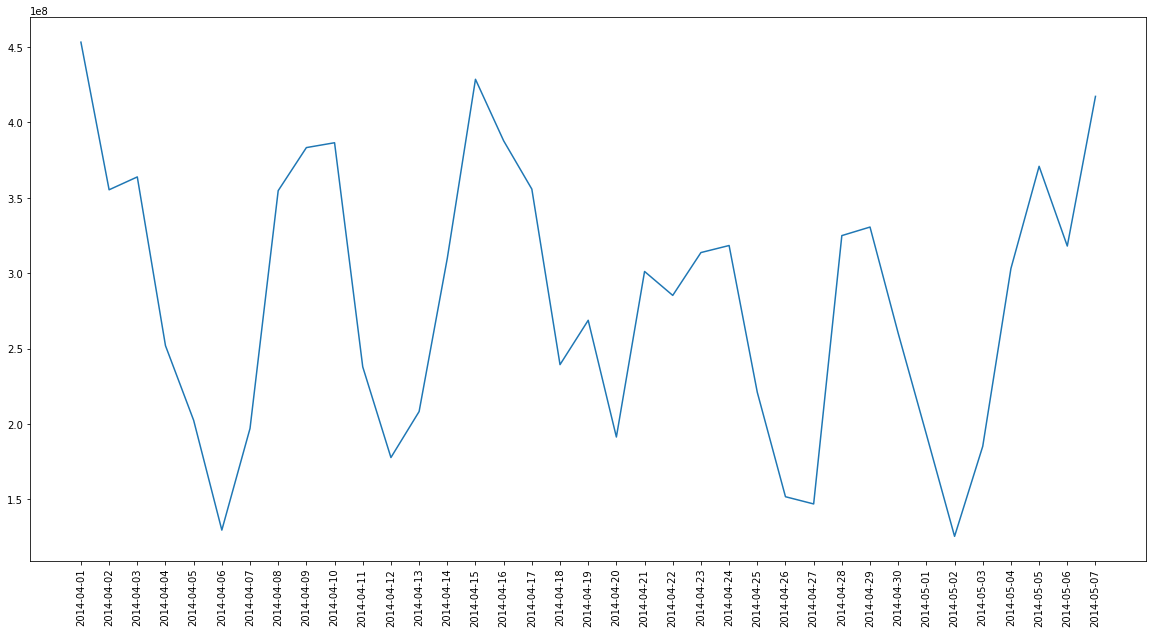

In [30]:
plt.figure(figsize=(20,10))
plt.plot(purchase2.total_purchase_amt)
data_range = pd.date_range("2014-04-01", "2014-05-07")
plt.xticks(data_range, rotation=90)
plt.show()

节假日有很明显的影响

#### 3 看时间序列的平稳性

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
t = adfuller(purchase["total_purchase_amt"])
t

(-1.5898802926313507,
 0.4886749751375928,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15960.28197033403)

不能拒绝原假设（不平稳）（-1.5898802926313507 大于1%，5%， 10%）

In [33]:
t2 = adfuller(redeem["total_redeem_amt"])
t2

(-1.372413679828339,
 0.5954275877949474,
 13,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15816.780952766481)

-1.372413679828339 大于1%，5%， 10%，不能拒绝原假设（不平稳）

#### 4 进行一阶差分

In [34]:
diff1 = purchase.diff(1)
diff1

,total_purchase_amt
report_date,
2013-07-01,NaN
2013-07-02,-3450958.0
2013-07-03,-1766620.0
2013-07-04,-8949585.0
2013-07-05,-6672436.0
...,...
2014-08-27,-4750288.0
2014-08-28,-57112050.0
2014-08-29,22471962.0


In [35]:
t = adfuller(diff1["total_purchase_amt"][1:])
t

(-7.947102224652343,
 3.198186862488185e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

-7.947102224652343 比1%，5%， 10%都小，能拒绝原假设，即平稳

In [36]:
diff2 = redeem.diff(1)
diff2

,total_redeem_amt
report_date,
2013-07-01,NaN
2013-07-02,-2970474.0
2013-07-03,3399319.0
2013-07-04,456862.0
2013-07-05,-3647142.0
...,...
2014-08-27,182685584.0
2014-08-28,-170270286.0
2014-08-29,-24137481.0


In [37]:
t2 = adfuller(diff2["total_redeem_amt"][1:])
t2

(-11.69198690696884,
 1.6443717458497645e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

-11.69198690696884比1%，5%， 10%都小，能拒绝原假设，即平稳

#### 5 构建ARIMA模型

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
# p,d,q，其中d=1
model = ARIMA(purchase, order=(7,1,5)).fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [40]:
purchase_pred = model.predict("2014-09-01", "2014-09-30")
purchase_pred

2014-09-01    5.596364e+07
2014-09-02    8.223714e+05
2014-09-03    2.014762e+06
2014-09-04   -3.557184e+07
2014-09-05   -5.756826e+07
2014-09-06   -1.413690e+07
2014-09-07    1.694147e+07
2014-09-08    5.353110e+07
2014-09-09    3.504088e+07
2014-09-10   -5.607702e+06
2014-09-11   -3.483567e+07
2014-09-12   -5.241387e+07
2014-09-13   -1.391521e+07
2014-09-14    2.217391e+07
2014-09-15    4.756474e+07
2014-09-16    3.940740e+07
2014-09-17   -6.419217e+06
2014-09-18   -3.537193e+07
2014-09-19   -4.781316e+07
2014-09-20   -1.732563e+07
2014-09-21    2.545190e+07
2014-09-22    4.504894e+07
2014-09-23    3.860283e+07
2014-09-24   -4.479982e+06
2014-09-25   -3.748419e+07
2014-09-26   -4.417224e+07
2014-09-27   -1.871147e+07
2014-09-28    2.562021e+07
2014-09-29    4.512312e+07
2014-09-30    3.613164e+07
Freq: D, dtype: float64

有负值，说明是对差分后的结果预测，应该预测差分前的值\
下面使用typ="levels"，相当于进行了反差分

In [41]:
purchase_pred = model.predict("2014-09-01", "2014-09-30", typ="levels")
purchase_pred

2014-09-01    3.310539e+08
2014-09-02    3.318762e+08
2014-09-03    3.338910e+08
2014-09-04    2.983191e+08
2014-09-05    2.407509e+08
2014-09-06    2.266140e+08
2014-09-07    2.435554e+08
2014-09-08    2.970865e+08
2014-09-09    3.321274e+08
2014-09-10    3.265197e+08
2014-09-11    2.916841e+08
2014-09-12    2.392702e+08
2014-09-13    2.253550e+08
2014-09-14    2.475289e+08
2014-09-15    2.950936e+08
2014-09-16    3.345010e+08
2014-09-17    3.280818e+08
2014-09-18    2.927099e+08
2014-09-19    2.448967e+08
2014-09-20    2.275711e+08
2014-09-21    2.530230e+08
2014-09-22    2.980719e+08
2014-09-23    3.366748e+08
2014-09-24    3.321948e+08
2014-09-25    2.947106e+08
2014-09-26    2.505384e+08
2014-09-27    2.318269e+08
2014-09-28    2.574471e+08
2014-09-29    3.025702e+08
2014-09-30    3.387019e+08
Freq: D, dtype: float64

In [42]:
model2 = ARIMA(redeem, order=(7,1,5)).fit()
redeem_pred = model2.predict("2014-09-01", "2014-09-30", typ="levels")
redeem_pred

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2014-09-01    3.169090e+08
2014-09-02    3.372455e+08
2014-09-03    3.632442e+08
2014-09-04    3.074694e+08
2014-09-05    2.628057e+08
2014-09-06    2.258706e+08
2014-09-07    2.592158e+08
2014-09-08    3.115468e+08
2014-09-09    3.477437e+08
2014-09-10    3.562431e+08
2014-09-11    3.092719e+08
2014-09-12    2.598512e+08
2014-09-13    2.339112e+08
2014-09-14    2.578186e+08
2014-09-15    3.125493e+08
2014-09-16    3.537239e+08
2014-09-17    3.573622e+08
2014-09-18    3.146179e+08
2014-09-19    2.626592e+08
2014-09-20    2.387440e+08
2014-09-21    2.616172e+08
2014-09-22    3.157165e+08
2014-09-23    3.588117e+08
2014-09-24    3.611535e+08
2014-09-25    3.197931e+08
2014-09-26    2.672031e+08
2014-09-27    2.432839e+08
2014-09-28    2.661170e+08
2014-09-29    3.197114e+08
2014-09-30    3.635485e+08
Freq: D, dtype: float64

In [43]:
model.aic, model2.aic # 越小越好

(16669.646033929606, 16519.896275849063)

#### 6 画出预测值

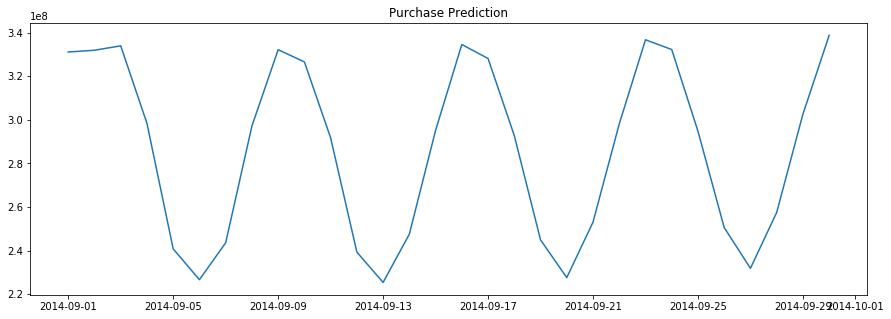

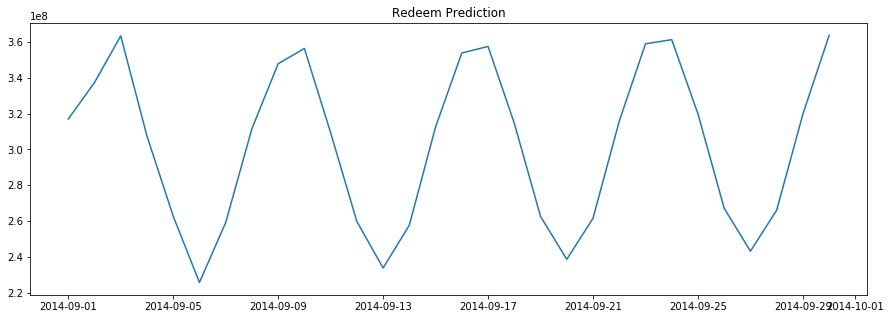

In [44]:
plt.figure(figsize=(15, 5))
plt.title("Purchase Prediction")
plt.plot(purchase_pred)
plt.show()

plt.figure(figsize=(15, 5))
plt.title("Redeem Prediction")
plt.plot(redeem_pred)
plt.show()

#### 7 合并结果值

In [45]:
result = pd.DataFrame()
result["date"] = purchase_pred.index
result["purchase_amt"] = purchase_pred.values
result["redeem_amt"] = redeem_pred.values
result

,date,purchase_amt,redeem_amt
0,2014-09-01,3.310539e+08,3.169090e+08
1,2014-09-02,3.318762e+08,3.372455e+08
2,2014-09-03,3.338910e+08,3.632442e+08
3,2014-09-04,2.983191e+08,3.074694e+08
4,2014-09-05,2.407509e+08,2.628057e+08
5,2014-09-06,2.266140e+08,2.258706e+08
6,2014-09-07,2.435554e+08,2.592158e+08
7,2014-09-08,2.970865e+08,3.115468e+08
8,2014-09-09,3.321274e+08,3.477437e+08
9,2014-09-10,3.265197e+08,3.562431e+08


In [46]:
result["date"] = result["date"].apply(lambda x: str(x).replace("-", "")[:8])
result

,date,purchase_amt,redeem_amt
0,20140901,3.310539e+08,3.169090e+08
1,20140902,3.318762e+08,3.372455e+08
2,20140903,3.338910e+08,3.632442e+08
3,20140904,2.983191e+08,3.074694e+08
4,20140905,2.407509e+08,2.628057e+08
5,20140906,2.266140e+08,2.258706e+08
6,20140907,2.435554e+08,2.592158e+08
7,20140908,2.970865e+08,3.115468e+08
8,20140909,3.321274e+08,3.477437e+08
9,20140910,3.265197e+08,3.562431e+08


In [47]:
result.to_csv("arima.csv", header=None, index=False)

#### 8 分数

**finalScore:100.9975**

### 14.1.4 周期性因子模型

#### 1 给数据添加时间维度

In [48]:
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,0,0,0,61,NaN,NaN,NaN,NaN
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,0,0,0,60,0.0,0.0,0.0,12500.0
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,0,0,0,2297,NaN,NaN,NaN,NaN
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,31732,0,31732,2298,NaN,NaN,NaN,NaN


In [49]:
def add_timestamp(data):
    # 时间格式转换
    data["report_date"] = pd.to_datetime(data["report_date"], format="%Y%m%d")
    # 添加时间维度
    data["day"] = data["report_date"].dt.day
    data["month"] = data["report_date"].dt.month
    data["year"] = data["report_date"].dt.year
    data["week"] = data["report_date"].dt.week
    data["weekday"] = data["report_date"].dt.weekday
    return data
data = add_timestamp(data)
data

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,share_amt,category1,category2,category3,category4,day,month,year,week,weekday
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,5,8,2014,32,1
1,1,2014-08-08,20391,20389,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,8,8,2014,32,4
2,1,2014-08-11,20397,20395,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,11,8,2014,33,0
3,1,2014-08-14,20403,20401,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,14,8,2014,33,3
4,1,2014-08-17,20409,20407,2,0,0,0,0,0,...,2,NaN,NaN,NaN,NaN,17,8,2014,33,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840416,28033,2014-08-25,550646,550585,61,0,0,0,0,0,...,61,NaN,NaN,NaN,NaN,25,8,2014,35,0
2840417,28033,2014-08-31,525707,538147,60,0,0,0,12500,12500,...,60,0.0,0.0,0.0,12500.0,31,8,2014,35,6
2840418,28033,2014-07-24,20487121,20484824,2297,0,0,0,0,0,...,2297,NaN,NaN,NaN,NaN,24,7,2014,30,3
2840419,28033,2014-07-27,20462288,20491722,2298,0,0,0,31732,0,...,2298,NaN,NaN,NaN,NaN,27,7,2014,30,6


In [50]:
data["weekday"].value_counts()

6    410701
5    408824
4    407509
3    405907
2    404159
1    402536
0    400785
Name: weekday, dtype: int64

#### 4 筛选部分数据

In [51]:
def get_total_balance(data, begin):
    df_temp = data.copy()
    # 按照data进行聚合
    df_temp = df_temp.groupby(["report_date"])["total_purchase_amt", "total_redeem_amt"].sum()
    #还原date字段，重新索引
    df_temp.reset_index(inplace=True)
    df_temp = df_temp[(df_temp["report_date"] >= begin)]
    return df_temp

In [52]:
#筛选从2014-04-01之后的数据，作为平稳数据
# total_balance = get_total_balance(data, "2014-04-01")
# total_balance

In [53]:
total_balance = get_total_balance(data, "2014-03-01")
total_balance

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,report_date,total_purchase_amt,total_redeem_amt
243,2014-03-01,362865580,211279011
244,2014-03-02,276202230,246199417
245,2014-03-03,505305862,513017360
246,2014-03-04,524146340,250562978
247,2014-03-05,454295491,209072753
...,...,...,...
422,2014-08-27,302194801,468164147
423,2014-08-28,245082751,297893861
424,2014-08-29,267554713,273756380
425,2014-08-30,199708772,196374134


#### 5 生成测试数据

In [54]:
import datetime
import numpy as np

In [55]:
def generate_test_data(data):
    total_balance = data.copy()
    start = datetime.datetime(2014,9,1)
#     end = datatime.datetime(2014,9,30)
    end = datetime.datetime(2014,10,1)
    testdata = []
    while start != end:
        # 添加三个字段: date, total_purchase_amt, total_redeem_amt
        temp = [start, np.nan, np.nan]
        testdata.append(temp)
        # 日期+1
        start += datetime.timedelta(days=1)
    # 封装testdata
    testdata = pd.DataFrame(testdata)
    testdata.columns = total_balance.columns
    # 将testdata合并到total_balance中
    total_balance = pd.concat([total_balance, testdata], axis=0)
    return total_balance
    

In [56]:
total_balance = generate_test_data(total_balance)
total_balance

,report_date,total_purchase_amt,total_redeem_amt
243,2014-03-01,362865580.0,211279011.0
244,2014-03-02,276202230.0,246199417.0
245,2014-03-03,505305862.0,513017360.0
246,2014-03-04,524146340.0,250562978.0
247,2014-03-05,454295491.0,209072753.0
...,...,...,...
25,2014-09-26,NaN,NaN
26,2014-09-27,NaN,NaN
27,2014-09-28,NaN,NaN
28,2014-09-29,NaN,NaN


在原有的数据上增加了30天

#### 6 对新生成的数据添加时间维度

In [57]:
total_balance = add_timestamp(total_balance)
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
243,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5
244,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6
245,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0
246,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1
247,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2
...,...,...,...,...,...,...,...,...
25,2014-09-26,NaN,NaN,26,9,2014,39,4
26,2014-09-27,NaN,NaN,27,9,2014,39,5
27,2014-09-28,NaN,NaN,28,9,2014,39,6
28,2014-09-29,NaN,NaN,29,9,2014,40,0


#### 7 计算weekday权重

In [58]:
# 备份一下total_balance
total_balance_bak = total_balance.copy()

In [59]:
total_balance = total_balance_bak.copy()
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday
243,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5
244,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6
245,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0
246,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1
247,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2
...,...,...,...,...,...,...,...,...
25,2014-09-26,NaN,NaN,26,9,2014,39,4
26,2014-09-27,NaN,NaN,27,9,2014,39,5
27,2014-09-28,NaN,NaN,28,9,2014,39,6
28,2014-09-29,NaN,NaN,29,9,2014,40,0


In [60]:
week_weight = total_balance[["weekday", "total_purchase_amt", "total_redeem_amt"]].groupby("weekday", as_index=False).mean()
week_weight

,weekday,total_purchase_amt,total_redeem_amt
0,0,3.273693e+08,3.456808e+08
1,1,3.340518e+08,3.221266e+08
2,2,3.213877e+08,3.181960e+08
3,3,3.146910e+08,2.821480e+08
4,4,2.492893e+08,2.680463e+08
5,5,1.958666e+08,1.840544e+08
6,6,1.966477e+08,2.093138e+08


In [61]:
week_weight = week_weight.rename(columns={"total_purchase_amt": "purchase_weekday", "total_redeem_amt":"redeem_weekday"})
week_weight

,weekday,purchase_weekday,redeem_weekday
0,0,3.273693e+08,3.456808e+08
1,1,3.340518e+08,3.221266e+08
2,2,3.213877e+08,3.181960e+08
3,3,3.146910e+08,2.821480e+08
4,4,2.492893e+08,2.680463e+08
5,5,1.958666e+08,1.840544e+08
6,6,1.966477e+08,2.093138e+08


In [62]:
week_weight["purchase_weekday"] /= np.mean(total_balance["total_purchase_amt"])
week_weight["redeem_weekday"] /= np.mean(total_balance["total_redeem_amt"])

In [63]:
week_weight

,weekday,purchase_weekday,redeem_weekday
0,0,1.185411,1.257964
1,1,1.209608,1.172248
2,2,1.163752,1.157944
3,3,1.139503,1.026762
4,4,0.902682,0.975445
5,5,0.709237,0.669791
6,6,0.712065,0.761712


In [64]:
total_balance = pd.merge(total_balance, week_weight, on="weekday", how="left")
total_balance

,report_date,total_purchase_amt,total_redeem_amt,day,month,year,week,weekday,purchase_weekday,redeem_weekday
0,2014-03-01,362865580.0,211279011.0,1,3,2014,9,5,0.709237,0.669791
1,2014-03-02,276202230.0,246199417.0,2,3,2014,9,6,0.712065,0.761712
2,2014-03-03,505305862.0,513017360.0,3,3,2014,10,0,1.185411,1.257964
3,2014-03-04,524146340.0,250562978.0,4,3,2014,10,1,1.209608,1.172248
4,2014-03-05,454295491.0,209072753.0,5,3,2014,10,2,1.163752,1.157944
...,...,...,...,...,...,...,...,...,...,...
209,2014-09-26,NaN,NaN,26,9,2014,39,4,0.902682,0.975445
210,2014-09-27,NaN,NaN,27,9,2014,39,5,0.709237,0.669791
211,2014-09-28,NaN,NaN,28,9,2014,39,6,0.712065,0.761712
212,2014-09-29,NaN,NaN,29,9,2014,40,0,1.185411,1.257964


#### 8 统计日期因子

In [65]:
# 统计周一到周日，在1-31号中出现的频次["weekday", "day"]出现的频次
total_balance[["report_date", "weekday", "day"]]

,report_date,weekday,day
0,2014-03-01,5,1
1,2014-03-02,6,2
2,2014-03-03,0,3
3,2014-03-04,1,4
4,2014-03-05,2,5
...,...,...,...
209,2014-09-26,4,26
210,2014-09-27,5,27
211,2014-09-28,6,28
212,2014-09-29,0,29


In [66]:
total_balance[["report_date", "day", "weekday"]].groupby(["day", "weekday"]).count()

report_date
day weekday             
1   0                  1
    1                  2
    3                  1
    4                  1
    5                  1
...                  ...
30  6                  1
31  0                  1
    3                  1
    5                  1
    6                  1

[184 rows x 1 columns]

In [67]:
weekday_count = total_balance[["report_date", "day", "weekday"]].groupby(["day", "weekday"], as_index=False).count()
weekday_count

,day,weekday,report_date
0,1,0,1
1,1,1,2
2,1,3,1
3,1,4,1
4,1,5,1
...,...,...,...
179,30,6,1
180,31,0,1
181,31,3,1
182,31,5,1


In [68]:
weekday_count = pd.merge(weekday_count, week_weight, on="weekday")
weekday_count

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,0,1,1.185411,1.257964
1,2,0,1,1.185411,1.257964
2,3,0,1,1.185411,1.257964
3,4,0,1,1.185411,1.257964
4,5,0,1,1.185411,1.257964
...,...,...,...,...,...
179,25,2,1,1.163752,1.157944
180,26,2,1,1.163752,1.157944
181,27,2,1,1.163752,1.157944
182,28,2,1,1.163752,1.157944


In [69]:
np.unique(total_balance["month"])

array([3, 4, 5, 6, 7, 8, 9])

In [70]:
len(np.unique(total_balance["month"]))

7

In [71]:
# 日期计算 = 周期因子 * （周一到周日在1到31号中出现的频次） / 一共有几个月
weekday_count["purchase_weekday"] = weekday_count["purchase_weekday"] * weekday_count["report_date"] / len(np.unique(total_balance["month"]))
weekday_count

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,0,1,0.169344,1.257964
1,2,0,1,0.169344,1.257964
2,3,0,1,0.169344,1.257964
3,4,0,1,0.169344,1.257964
4,5,0,1,0.169344,1.257964
...,...,...,...,...,...
179,25,2,1,0.166250,1.157944
180,26,2,1,0.166250,1.157944
181,27,2,1,0.166250,1.157944
182,28,2,1,0.166250,1.157944


In [72]:
weekday_count["redeem_weekday"] = weekday_count["redeem_weekday"] * weekday_count["report_date"] / len(np.unique(total_balance["month"]))
weekday_count

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,0,1,0.169344,0.179709
1,2,0,1,0.169344,0.179709
2,3,0,1,0.169344,0.179709
3,4,0,1,0.169344,0.179709
4,5,0,1,0.169344,0.179709
...,...,...,...,...,...
179,25,2,1,0.166250,0.165421
180,26,2,1,0.166250,0.165421
181,27,2,1,0.166250,0.165421
182,28,2,1,0.166250,0.165421


In [73]:
weekday_count.groupby("day", as_index=False).sum()

,day,weekday,report_date,purchase_weekday,redeem_weekday
0,1,19,7,1.009731,1.005167
1,2,18,7,1.006644,1.021864
2,3,17,7,1.037011,1.010455
3,4,16,7,1.030815,1.046789
4,5,15,7,1.002776,0.989992
5,6,21,7,0.935559,0.932230
6,7,20,7,0.999723,1.015369
7,8,19,7,1.009731,1.005167
8,9,18,7,1.006644,1.021864
9,10,17,7,1.037011,1.010455


In [74]:
# 得到日期因子率
day_rate = weekday_count.drop(["weekday", "report_date"], axis=1).groupby("day", as_index=False).sum()
day_rate

,day,purchase_weekday,redeem_weekday
0,1,1.009731,1.005167
1,2,1.006644,1.021864
2,3,1.037011,1.010455
3,4,1.030815,1.046789
4,5,1.002776,0.989992
5,6,0.935559,0.932230
6,7,0.999723,1.015369
7,8,1.009731,1.005167
8,9,1.006644,1.021864
9,10,1.037011,1.010455


#### 9 按照日期day计算均值

In [75]:
total_balance[["day", "total_purchase_amt", "total_redeem_amt"]]

,day,total_purchase_amt,total_redeem_amt
0,1,362865580.0,211279011.0
1,2,276202230.0,246199417.0
2,3,505305862.0,513017360.0
3,4,524146340.0,250562978.0
4,5,454295491.0,209072753.0
...,...,...,...
209,26,NaN,NaN
210,27,NaN,NaN
211,28,NaN,NaN
212,29,NaN,NaN


In [76]:
day_mean = total_balance[["day", "total_purchase_amt", "total_redeem_amt"]].groupby("day", as_index=False).mean()
day_mean

,day,total_purchase_amt,total_redeem_amt
0,1,3.253391e+08,2.347676e+08
1,2,2.481255e+08,2.186074e+08
2,3,2.994808e+08,2.968247e+08
3,4,3.159802e+08,2.925598e+08
4,5,3.286272e+08,2.552484e+08
5,6,2.998453e+08,2.460958e+08
6,7,2.836725e+08,2.374837e+08
7,8,2.918664e+08,2.475255e+08
8,9,2.856603e+08,2.440269e+08
9,10,3.446347e+08,2.593854e+08


#### 10 合并day_mean和day_rate

In [77]:
day_rate

,day,purchase_weekday,redeem_weekday
0,1,1.009731,1.005167
1,2,1.006644,1.021864
2,3,1.037011,1.010455
3,4,1.030815,1.046789
4,5,1.002776,0.989992
5,6,0.935559,0.932230
6,7,0.999723,1.015369
7,8,1.009731,1.005167
8,9,1.006644,1.021864
9,10,1.037011,1.010455


In [78]:
day_pred = pd.merge(day_mean, day_rate, on="day", how="left")
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday
0,1,3.253391e+08,2.347676e+08,1.009731,1.005167
1,2,2.481255e+08,2.186074e+08,1.006644,1.021864
2,3,2.994808e+08,2.968247e+08,1.037011,1.010455
3,4,3.159802e+08,2.925598e+08,1.030815,1.046789
4,5,3.286272e+08,2.552484e+08,1.002776,0.989992
5,6,2.998453e+08,2.460958e+08,0.935559,0.932230
6,7,2.836725e+08,2.374837e+08,0.999723,1.015369
7,8,2.918664e+08,2.475255e+08,1.009731,1.005167
8,9,2.856603e+08,2.440269e+08,1.006644,1.021864
9,10,3.446347e+08,2.593854e+08,1.037011,1.010455


#### 11 生成预测数据

In [79]:
day_pred["total_purchase_amt"] /= day_pred["purchase_weekday"]
day_pred["total_redeem_amt"] /= day_pred["redeem_weekday"]

In [80]:
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992
5,6,3.204986e+08,2.639860e+08,0.935559,0.932230
6,7,2.837511e+08,2.338892e+08,0.999723,1.015369
7,8,2.890537e+08,2.462531e+08,1.009731,1.005167
8,9,2.837750e+08,2.388057e+08,1.006644,1.021864
9,10,3.323346e+08,2.567017e+08,1.037011,1.010455


In [81]:
for index, row in day_pred.iterrows():
    if row["day"] == 31:
        break
    # 添加日期字段report_date
    day_pred.loc[index, "report_date"] = pd.to_datetime("2014/09/" + str(int(row["day"])))
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167,2014-09-01
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864,2014-09-02
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455,2014-09-03
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789,2014-09-04
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992,2014-09-05
5,6,3.204986e+08,2.639860e+08,0.935559,0.932230,2014-09-06
6,7,2.837511e+08,2.338892e+08,0.999723,1.015369,2014-09-07
7,8,2.890537e+08,2.462531e+08,1.009731,1.005167,2014-09-08
8,9,2.837750e+08,2.388057e+08,1.006644,1.021864,2014-09-09
9,10,3.323346e+08,2.567017e+08,1.037011,1.010455,2014-09-10


In [82]:
# 利用周期因子，进行base * 周期因子=预测结果
day_pred["weekday"] = day_pred["report_date"].dt.weekday
day_pred

,day,total_purchase_amt,total_redeem_amt,purchase_weekday,redeem_weekday,report_date,weekday
0,1,3.222038e+08,2.335608e+08,1.009731,1.005167,2014-09-01,0.0
1,2,2.464879e+08,2.139300e+08,1.006644,1.021864,2014-09-02,1.0
2,3,2.887923e+08,2.937537e+08,1.037011,1.010455,2014-09-03,2.0
3,4,3.065345e+08,2.794832e+08,1.030815,1.046789,2014-09-04,3.0
4,5,3.277176e+08,2.578287e+08,1.002776,0.989992,2014-09-05,4.0
5,6,3.204986e+08,2.639860e+08,0.935559,0.932230,2014-09-06,5.0
6,7,2.837511e+08,2.338892e+08,0.999723,1.015369,2014-09-07,6.0
7,8,2.890537e+08,2.462531e+08,1.009731,1.005167,2014-09-08,0.0
8,9,2.837750e+08,2.388057e+08,1.006644,1.021864,2014-09-09,1.0
9,10,3.323346e+08,2.567017e+08,1.037011,1.010455,2014-09-10,2.0


In [83]:
day_pred = day_pred[["day", "total_purchase_amt", "total_redeem_amt", "report_date", "weekday"]]
day_pred

,day,total_purchase_amt,total_redeem_amt,report_date,weekday
0,1,3.222038e+08,2.335608e+08,2014-09-01,0.0
1,2,2.464879e+08,2.139300e+08,2014-09-02,1.0
2,3,2.887923e+08,2.937537e+08,2014-09-03,2.0
3,4,3.065345e+08,2.794832e+08,2014-09-04,3.0
4,5,3.277176e+08,2.578287e+08,2014-09-05,4.0
5,6,3.204986e+08,2.639860e+08,2014-09-06,5.0
6,7,2.837511e+08,2.338892e+08,2014-09-07,6.0
7,8,2.890537e+08,2.462531e+08,2014-09-08,0.0
8,9,2.837750e+08,2.388057e+08,2014-09-09,1.0
9,10,3.323346e+08,2.567017e+08,2014-09-10,2.0


In [84]:
day_pred = pd.merge(day_pred, week_weight, on="weekday")
day_pred

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
0,1,3.222038e+08,2.335608e+08,2014-09-01,0.0,1.185411,1.257964
1,8,2.890537e+08,2.462531e+08,2014-09-08,0.0,1.185411,1.257964
2,15,2.929654e+08,2.290269e+08,2014-09-15,0.0,1.185411,1.257964
3,22,2.406857e+08,2.599297e+08,2014-09-22,0.0,1.185411,1.257964
4,29,2.419552e+08,2.677531e+08,2014-09-29,0.0,1.185411,1.257964
5,2,2.464879e+08,2.139300e+08,2014-09-02,1.0,1.209608,1.172248
6,9,2.837750e+08,2.388057e+08,2014-09-09,1.0,1.209608,1.172248
7,16,3.123351e+08,3.058029e+08,2014-09-16,1.0,1.209608,1.172248
8,23,2.267902e+08,2.569529e+08,2014-09-23,1.0,1.209608,1.172248
9,30,2.377294e+08,2.874474e+08,2014-09-30,1.0,1.209608,1.172248


In [85]:
day_pred["total_purchase_amt"] *= day_pred["purchase_weekday"]
day_pred["total_redeem_amt"] *= day_pred["redeem_weekday"]
day_pred

,day,total_purchase_amt,total_redeem_amt,report_date,weekday,purchase_weekday,redeem_weekday
0,1,3.819439e+08,2.938111e+08,2014-09-01,0.0,1.185411,1.257964
1,8,3.426474e+08,3.097775e+08,2014-09-08,0.0,1.185411,1.257964
2,15,3.472844e+08,2.881076e+08,2014-09-15,0.0,1.185411,1.257964
3,22,2.853115e+08,3.269821e+08,2014-09-22,0.0,1.185411,1.257964
4,29,2.868163e+08,3.368237e+08,2014-09-29,0.0,1.185411,1.257964
5,2,2.981538e+08,2.507790e+08,2014-09-02,1.0,1.209608,1.172248
6,9,3.432566e+08,2.799395e+08,2014-09-09,1.0,1.209608,1.172248
7,16,3.778032e+08,3.584768e+08,2014-09-16,1.0,1.209608,1.172248
8,23,2.743273e+08,3.012125e+08,2014-09-23,1.0,1.209608,1.172248
9,30,2.875595e+08,3.369596e+08,2014-09-30,1.0,1.209608,1.172248


In [86]:
day_pred = day_pred.sort_values("report_date")[["report_date", "total_purchase_amt", "total_redeem_amt"]]
day_pred

,report_date,total_purchase_amt,total_redeem_amt
0,2014-09-01,3.819439e+08,2.938111e+08
5,2014-09-02,2.981538e+08,2.507790e+08
10,2014-09-03,3.360825e+08,3.401504e+08
14,2014-09-04,3.492969e+08,2.869627e+08
18,2014-09-05,2.958247e+08,2.514977e+08
22,2014-09-06,2.273095e+08,1.768153e+08
26,2014-09-07,2.020493e+08,1.781561e+08
1,2014-09-08,3.426474e+08,3.097775e+08
6,2014-09-09,3.432566e+08,2.799395e+08
11,2014-09-10,3.867549e+08,2.972462e+08


In [87]:
day_pred["report_date"] = day_pred["report_date"].apply(lambda x: str(x).replace("-", "")[:8])
day_pred

,report_date,total_purchase_amt,total_redeem_amt
0,20140901,3.819439e+08,2.938111e+08
5,20140902,2.981538e+08,2.507790e+08
10,20140903,3.360825e+08,3.401504e+08
14,20140904,3.492969e+08,2.869627e+08
18,20140905,2.958247e+08,2.514977e+08
22,20140906,2.273095e+08,1.768153e+08
26,20140907,2.020493e+08,1.781561e+08
1,20140908,3.426474e+08,3.097775e+08
6,20140909,3.432566e+08,2.799395e+08
11,20140910,3.867549e+08,2.972462e+08


In [88]:
# day_pred.to_csv("rule_base.csv", index=False, header=None)
#finalScore:116.8754

In [89]:
day_pred.to_csv("rule_base2.csv", index=False, header=None)
# finalScore:130.6812

### 14.1.5 各模型分数对比

+ Prophet   finalScore:78.5184
+ ARIMA模型  finalScore:100.9975
+ rule_base finalScore:130.6812

 ![](分数.png)